# Import Package

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Data Understanding

In [2]:
#load dataset
data = pd.read_excel("dataset cuaca.xlsx", header=1, index_col=None)
data.head()

,Tanggal,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car
0,01-07-2023,24.3,33.2,27.1,90.0,1.9,2.8,4.0,300.0,1.0,SE
1,02-07-2023,24.3,29.8,26.5,91.0,24.3,2.7,3.0,130.0,0.0,C
2,03-07-2023,24.0,34.0,27.9,86.0,3.4,0.4,3.0,70.0,1.0,C
3,04-07-2023,24.2,34.2,28.4,82.0,0.0,4.2,3.0,300.0,1.0,C
4,05-07-2023,24.2,32.2,27.4,88.0,0.0,7.7,4.0,280.0,1.0,C


In [3]:
data.tail(18)

,Tanggal,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car
364,29-06-2024,23.6,32.8,26.8,92.0,13.1,3.2,4.0,240.0,1.0,C
365,30-06-2024,23.8,33.3,26.3,90.0,4.2,1.8,4.0,170.0,1.0,C
366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
369,Keterangan :,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
370,8888: data tidak terukur,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
371,9999: Tidak Ada Data (tidak dilakukan pengukuran),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
372,Tn: Temperatur minimum\t (°C),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
373,Tx: Temperatur maksimum (°C),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data = data[:-16]
data.tail(15)

,Tanggal,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car
351,16-06-2024,23.8,33.3,27.5,87.0,0.4,7.9,5.0,260.0,1.0,C
352,17-06-2024,24.5,33.5,28.1,85.0,0.0,5.6,2.0,170.0,1.0,C
353,18-06-2024,24.9,31.9,27.2,90.0,0.2,5.7,2.0,170.0,1.0,C
354,19-06-2024,24.3,33.3,27.9,84.0,0.9,1.2,3.0,90.0,1.0,C
355,20-06-2024,24.0,28.8,26.1,92.0,0.0,4.4,2.0,170.0,0.0,C
356,21-06-2024,24.2,32.0,27.0,88.0,0.0,0.0,3.0,160.0,1.0,S
357,22-06-2024,23.3,31.2,26.7,88.0,12.4,0.3,6.0,290.0,2.0,SE
358,23-06-2024,23.6,31.7,26.6,86.0,9.1,2.7,2.0,140.0,1.0,C
359,24-06-2024,23.7,33.4,28.0,84.0,0.0,1.9,4.0,320.0,1.0,C
360,25-06-2024,24.0,33.7,28.2,85.0,0.0,7.3,4.0,330.0,1.0,C


In [5]:
data.shape

(366, 11)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Tanggal  366 non-null    object 
 1   Tn       364 non-null    float64
 2   Tx       362 non-null    float64
 3   Tavg     362 non-null    float64
 4   RH_avg   362 non-null    float64
 5   RR       363 non-null    float64
 6   ss       361 non-null    float64
 7   ff_x     364 non-null    float64
 8   ddd_x    364 non-null    float64
 9   ff_avg   364 non-null    float64
 10  ddd_car  364 non-null    object 
dtypes: float64(9), object(2)
memory usage: 31.6+ KB


## Eksplorasi Nilai Yang Tidak Valid

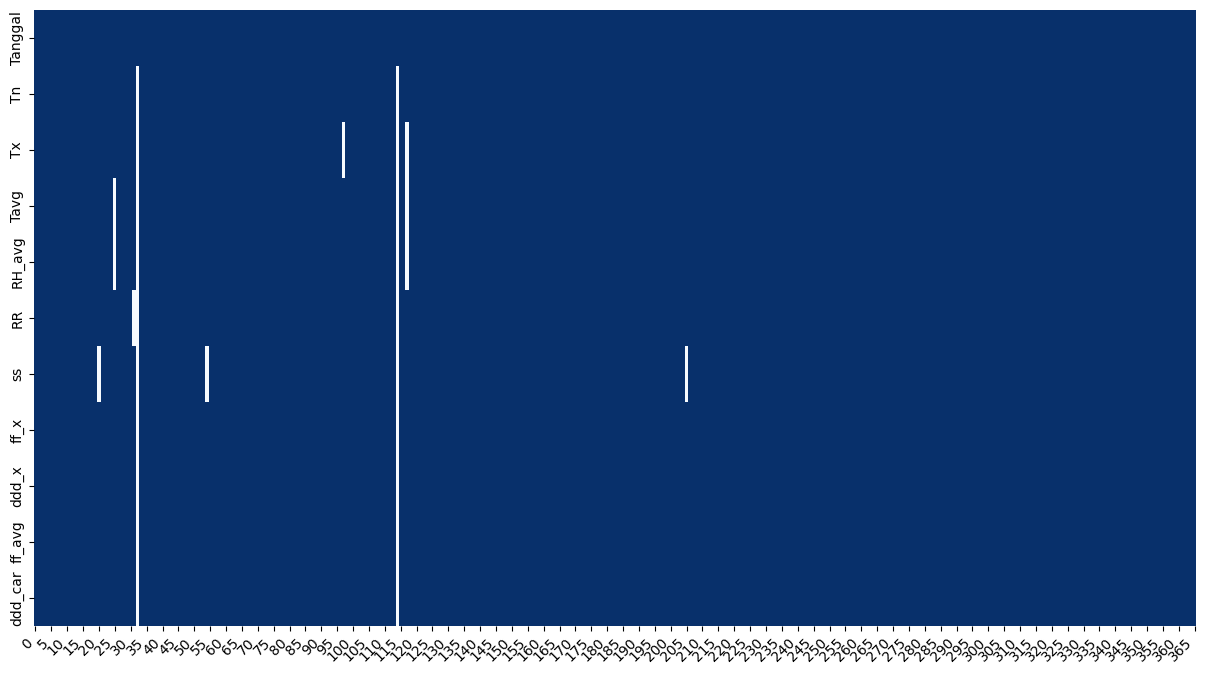

In [7]:
plot_missing_value(data)

In [8]:
data.isnull().sum()

Tanggal    0
Tn         2
Tx         4
Tavg       4
RH_avg     4
RR         3
ss         5
ff_x       2
ddd_x      2
ff_avg     2
ddd_car    2
dtype: int64

### Handling Missing Value with Drop

In [9]:
data = data.dropna().reset_index(drop=True)
data = data[~data['RR'].isin([8888, 9999])]
data.isnull().sum()

Tanggal    0
Tn         0
Tx         0
Tavg       0
RH_avg     0
RR         0
ss         0
ff_x       0
ddd_x      0
ff_avg     0
ddd_car    0
dtype: int64

In [10]:
numerik_cols = ['Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 'ddd_x', 'ff_avg']
data[numerik_cols].describe()

,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg
count,342.000000,342.000000,342.000000,342.000000,342.00000,342.000000,342.000000
mean,27.354094,87.926901,7.159942,4.622807,3.51462,217.520468,0.967836
std,0.921540,4.295252,14.549082,3.081818,1.00647,92.846188,0.486312
min,24.700000,74.000000,0.000000,0.000000,0.00000,10.000000,0.000000
25%,26.700000,85.000000,0.000000,1.925000,3.00000,150.000000,1.000000
50%,27.450000,88.000000,0.950000,4.400000,4.00000,250.000000,1.000000
75%,28.000000,90.750000,7.175000,7.000000,4.00000,300.000000,1.000000
max,29.900000,99.000000,103.400000,10.800000,8.00000,360.000000,3.000000


In [11]:
data['ddd_car'].value_counts()

ddd_car
C     303
S      23
SE      8
E       5
NW      2
NE      1
Name: count, dtype: int64

In [12]:
data.shape

(342, 11)

## Eksplorasi Distribusi Data

In [13]:
numerik_cols = ['Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 'ddd_x', 'ff_avg']
data[numerik_cols].describe()

,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg
count,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.00000,342.000000,342.000000
mean,24.245906,32.101170,27.354094,87.926901,7.159942,4.622807,3.51462,217.520468,0.967836
std,0.635391,1.567222,0.921540,4.295252,14.549082,3.081818,1.00647,92.846188,0.486312
min,22.200000,25.900000,24.700000,74.000000,0.000000,0.000000,0.00000,10.000000,0.000000
25%,23.800000,31.400000,26.700000,85.000000,0.000000,1.925000,3.00000,150.000000,1.000000
50%,24.200000,32.200000,27.450000,88.000000,0.950000,4.400000,4.00000,250.000000,1.000000
75%,24.700000,33.200000,28.000000,90.750000,7.175000,7.000000,4.00000,300.000000,1.000000
max,26.100000,35.600000,29.900000,99.000000,103.400000,10.800000,8.00000,360.000000,3.000000


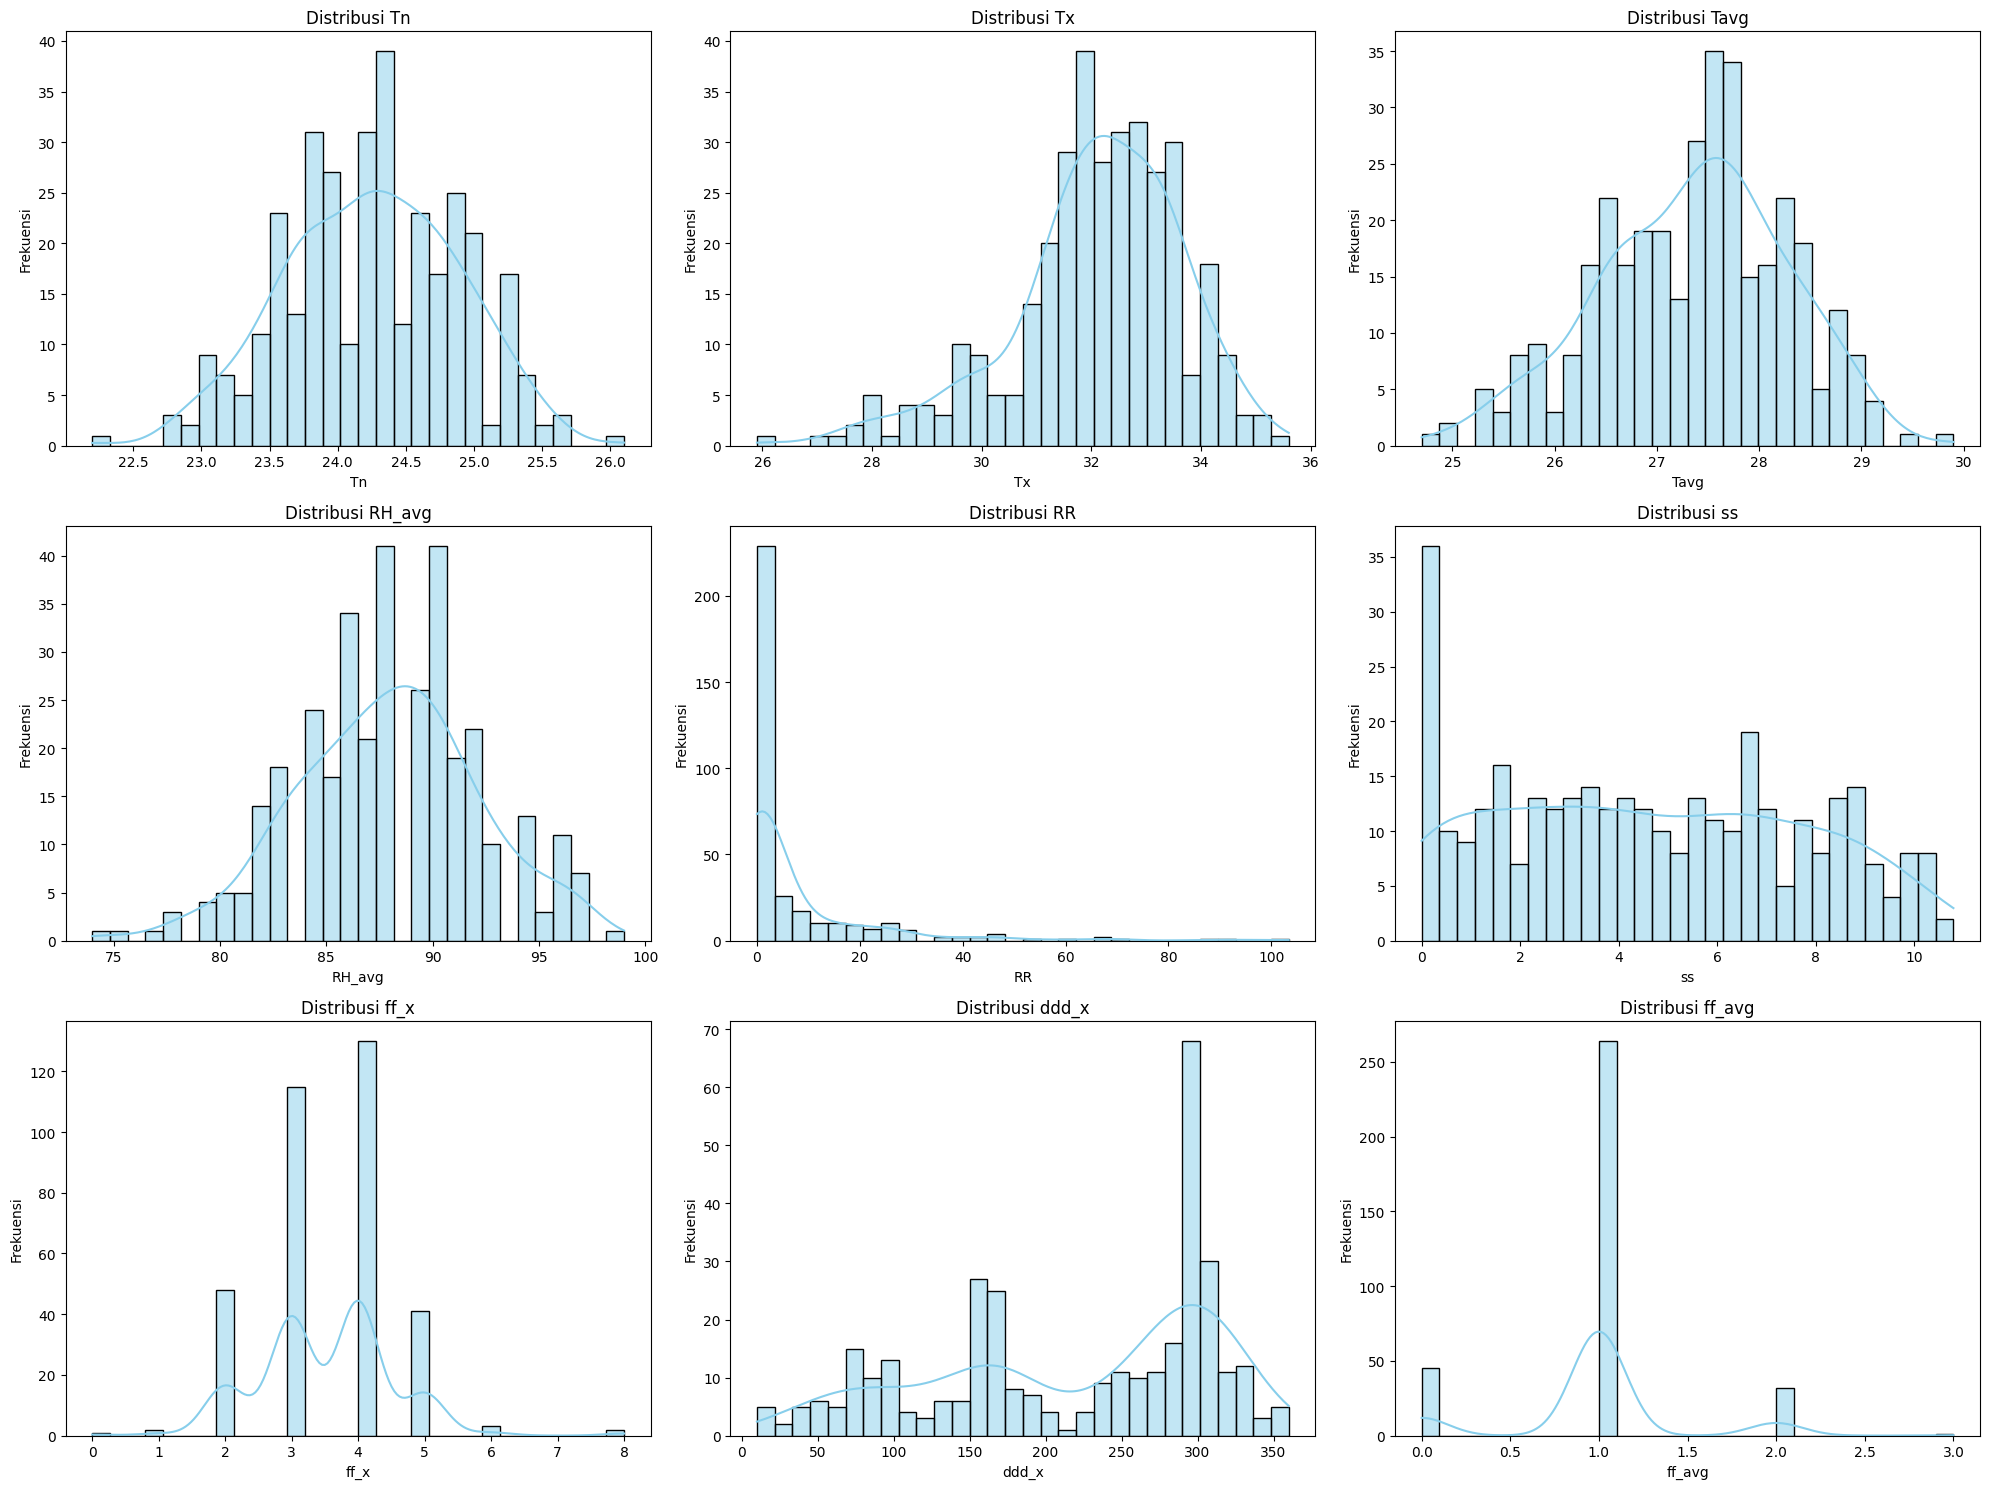

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set ukuran plot
plt.figure(figsize=(20, 15))

# Loop untuk setiap kolom dan buat histogram
for i, col in enumerate(numerik_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=data, x=col, kde=True, bins=30, color='skyblue')
    plt.title(f'Distribusi {col}', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('Frekuensi')

plt.tight_layout()
plt.savefig('distribusi_histogram.png', dpi=300)
plt.show()


In [15]:
data.drop(columns=['Tanggal', 'Tn', 'Tx'], inplace=True)
data.head()

,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car
0,27.1,90.0,1.9,2.8,4.0,300.0,1.0,SE
1,26.5,91.0,24.3,2.7,3.0,130.0,0.0,C
2,27.9,86.0,3.4,0.4,3.0,70.0,1.0,C
3,28.4,82.0,0.0,4.2,3.0,300.0,1.0,C
4,27.4,88.0,0.0,7.7,4.0,280.0,1.0,C


In [16]:
df = data.copy()

In [17]:
df.to_csv('readyForModeling.csv', index=False)

# Dataset Splitting

In [25]:
df.shape

(342, 8)

In [18]:
df.columns

Index(['Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 'ddd_x', 'ff_avg', 'ddd_car'], dtype='object')

In [19]:
X = df.drop(columns="Tavg")
y = df.Tavg

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((239, 7), (103, 7), (239,), (103,))

# Training

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp

In [27]:
X_train.shape

(239, 7)

In [28]:
y_test.shape

(103,)

In [29]:
X_train.columns

Index(['RH_avg', 'RR', 'ss', 'ff_x', 'ddd_x', 'ff_avg', 'ddd_car'], dtype='object')

In [32]:
gsp.rf_params

{'algo__n_estimators': [100, 150, 200],
 'algo__max_depth': [20, 50, 80],
 'algo__max_features': [0.3, 0.6, 0.8],
 'algo__min_samples_leaf': [1, 5, 10]}

In [33]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(impute='mean'), ['RH_avg', 'RR', 'ss', 'ff_x', 'ddd_x', 'ff_avg']),
    ('categoric', cat_pipe(encoder='onehot'), ["ddd_car"]),
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', RandomForestRegressor(n_jobs=-1, random_state=42))
])

model = GridSearchCV(pipeline, gsp.rf_params, cv=3, scoring="r2", n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 81 candidates, totalling 243 fits
{'algo__max_depth': 50, 'algo__max_features': 0.8, 'algo__min_samples_leaf': 5, 'algo__n_estimators': 100}
0.8467059659723627 0.7307541231858701 0.7399999171242293


## Feature Importance

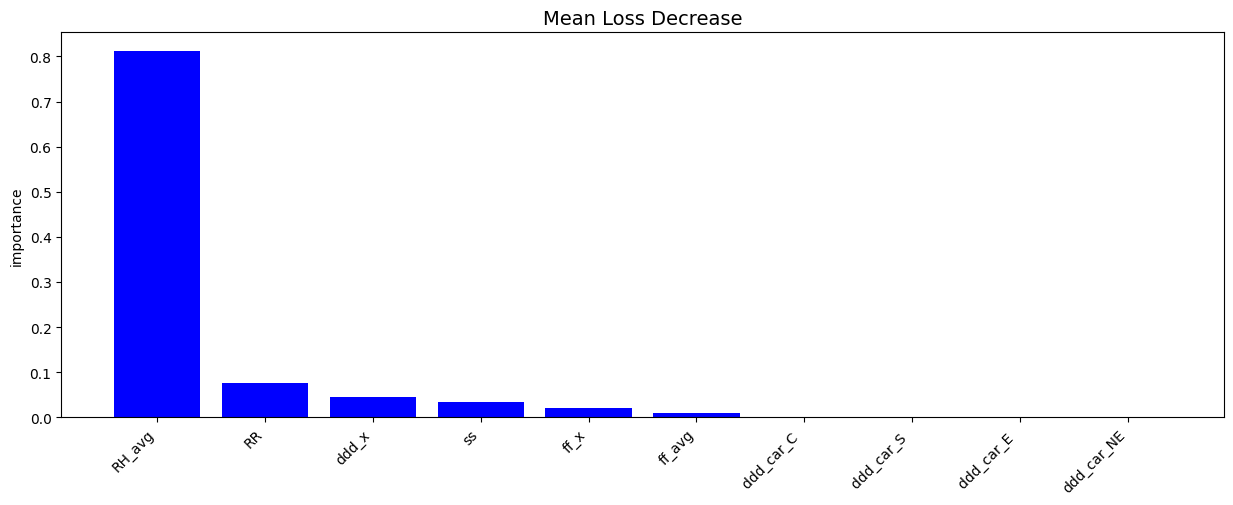

In [34]:
from jcopml.feature_importance import mean_loss_decrease 
df_imp = mean_loss_decrease(X_train, model, plot=True, topk=10)

In [39]:
df_imp = mean_loss_decrease(X_train, model, plot=False, topk=10)

# Tampilkan DataFrame hasil feature importance
print(df_imp)


       feature  importance
0       RH_avg    0.812341
1           RR    0.076270
4        ddd_x    0.045316
2           ss    0.034649
3         ff_x    0.019915
5       ff_avg    0.009871
6   ddd_car_C     0.001472
10  ddd_car_S     0.000167
7   ddd_car_E     0.000000
8   ddd_car_NE    0.000000


In [40]:
# Membuat DataFrame dari X_test
X_test_df = X_test.copy()

# Prediksi pada data test
y_pred = model.predict(X_test)

# Reset index agar sesuai dan tidak bentrok saat digabung
X_test_df = X_test_df.reset_index(drop=True)
y_test_reset = y_test.reset_index(drop=True)

# Gabungkan semua ke dalam satu DataFrame
comparison_df = X_test_df.copy()
comparison_df['Actual'] = y_test_reset
comparison_df['Predicted'] = y_pred

# Tampilkan 10 data pertama
comparison_df.head(10)


,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,Actual,Predicted
0,86.0,0.0,7.2,3.0,70.0,1.0,C,26.5,27.842509
1,84.0,0.0,0.2,5.0,270.0,1.0,C,28.3,28.343640
2,90.0,0.1,8.3,3.0,310.0,1.0,SE,26.4,27.312859
3,88.0,0.0,8.7,3.0,280.0,1.0,C,27.7,27.644625
4,89.0,4.3,6.1,3.0,280.0,1.0,C,27.3,27.381395
5,93.0,0.2,7.8,3.0,300.0,0.0,C,26.5,26.464353
6,91.0,20.2,1.4,3.0,290.0,1.0,C,26.7,26.713534
7,89.0,19.2,1.6,3.0,80.0,1.0,C,27.2,27.027306
8,90.0,1.3,2.9,5.0,170.0,1.0,C,26.6,26.937020
9,77.0,0.0,10.3,5.0,160.0,3.0,S,28.5,28.644433


In [41]:
# Prediksi pada data test
y_pred = model.predict(X_test)

# Hitung metrik evaluasi
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Tampilkan hasil evaluasi
print("Evaluasi Model pada Data Test:")
print(f"MSE  : {mse:.4f}  (Mean Squared Error)")
print(f"RMSE : {rmse:.4f}  (Root Mean Squared Error)")
print(f"MAE  : {mae:.4f}  (Mean Absolute Error)")
print(f"R2   : {r2:.4f}  (Coefficient of Determination)")


Evaluasi Model pada Data Test:
MSE  : 0.1996  (Mean Squared Error)
RMSE : 0.4468  (Root Mean Squared Error)
MAE  : 0.3525  (Mean Absolute Error)
R2   : 0.7400  (Coefficient of Determination)


In [42]:
save_model(model.best_estimator_, "rfr_cuaca.pkl")

Model is pickled as model/rfr_cuaca.pkl


In [47]:
# 2. Hitung statistik deskriptif
descriptive_stats = df.describe()  # Default-nya hanya untuk kolom numerik

In [48]:
descriptive_stats

,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg
count,342.000000,342.000000,342.000000,342.000000,342.00000,342.000000,342.000000
mean,27.354094,87.926901,7.159942,4.622807,3.51462,217.520468,0.967836
std,0.921540,4.295252,14.549082,3.081818,1.00647,92.846188,0.486312
min,24.700000,74.000000,0.000000,0.000000,0.00000,10.000000,0.000000
25%,26.700000,85.000000,0.000000,1.925000,3.00000,150.000000,1.000000
50%,27.450000,88.000000,0.950000,4.400000,4.00000,250.000000,1.000000
75%,28.000000,90.750000,7.175000,7.000000,4.00000,300.000000,1.000000
max,29.900000,99.000000,103.400000,10.800000,8.00000,360.000000,3.000000


In [50]:
extra_stats = descriptive_stats.agg(['skew', 'kurt'])

In [51]:
extra_stats

,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg
skew,2.788215,2.258449,2.425622,2.824198,2.826216,-0.510874,2.828137
kurt,7.840105,6.153733,5.970527,7.981955,7.990585,-0.821014,7.998763


In [52]:
import pickle

# Simpan dataset ke file pickle
with open('dataset.pkl', 'wb') as f:
    pickle.dump(df, f)
    
with open('descriptive_stats.pkl', 'wb') as f:
    pickle.dump(descriptive_stats, f)